## Prepare the surface fault rupture

Reference
+ Reitman, Nadine G, Richard W. Briggs, William D. Barnhart, Jessica A. Thompson Jobe, Christopher B. DuRoss, Alexandra E. Hatem, Ryan D. Gold, and John D. Mejstrik (2023) Preliminary fault rupture mapping of the 2023 M7.8 and M7.5 Türkiye Earthquakes. DOI: https://doi.org/10.5066/P985I7U2. Access date: 22 Feb 2023.

In [1]:
%matplotlib inline
import os
import geopandas as gpd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-02-17')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-02-17


### Read shape file

In [2]:
# read shape file
shp_file = os.path.join(work_dir, 'simple_fault_2023-2-17.shp')
gdf = gpd.read_file(shp_file)
line_strs = [geom for geom in gdf.geometry]
line_ids = gdf.FaultTrace     # 1 is “confident” (solid lines) and 2 is “queried” (dashed lines)

### Plot faults

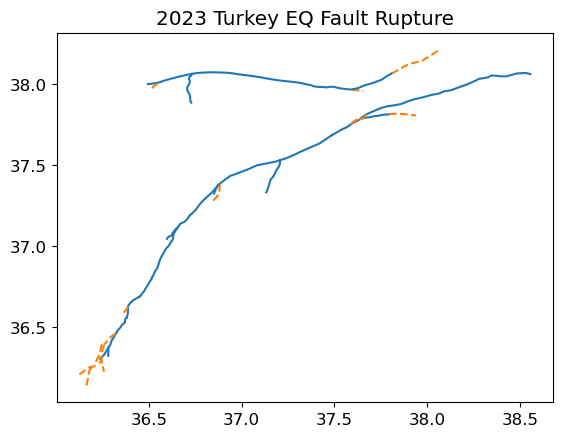

In [3]:
# plot
fig, ax = plt.subplots()
for line, line_id in zip(line_strs, line_ids):
    x, y = line.coords.xy
    lc = 'C0' if line_id == 1 else 'C1'
    ls = '-' if line_id == 1 else '--'
    ax.plot(x, y, lc, ls=ls)
# axis format
ax.set_title('2023 Turkey EQ Fault Rupture')
plt.show()

### Save to GMT lonlat file

In [4]:
for suffix, ref_id in zip(['_confident', '_queried'], [1, 2]):
    out_file = os.path.join(work_dir, f'../simple_fault{suffix}.lonlat')
    num_line = 0
    with open(out_file, 'w') as f:
        for line_str, line_id in zip(line_strs, line_ids):
            if line_id == ref_id:
                # new line - start
                num_line += 1
                f.write(f'> segment {num_line}\n')
                xs, ys = line_str.coords.xy
                for x, y in zip(xs, ys):
                    f.write(f'{x:.9f}\t{y:.9f}\n')
    print(f'write file: {out_file}')

write file: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-02-17/../simple_fault_confident.lonlat
write file: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-02-17/../simple_fault_queried.lonlat
